In [1]:
import pandas as pd
import re

In [2]:
data_english = pd.read_csv("dataset_en_hpv.csv")
data_italian = pd.read_csv("dataset_it_hpv.csv")
data_french = pd.read_csv("dataset_fr_hpv.csv")

English data

In [3]:
data_english['char_count'] = data_english['full_text'].apply(lambda x: len(x))
data_english['word_count'] = data_english['full_text'].apply(lambda x: len(x.split()))

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(font_scale=.5)

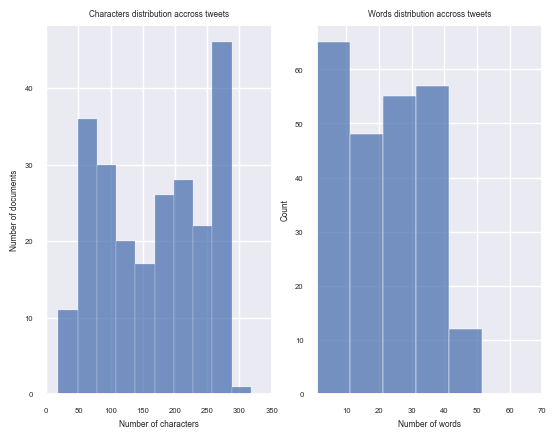

In [5]:
f, axes = plt.subplots(1, 2)

plot1 = sns.histplot(data_english.char_count, binwidth = 30, ax=axes[0]).set(title='Characters distribution accross tweets', xlabel='Number of characters', ylabel='Number of documents')
plot2 = sns.histplot(data_english.word_count, binwidth = 10, ax=axes[1]).set(title='Words distribution accross tweets', xlabel='Number of words')
axes[1].set_xlim(1,70)
axes[0].set_xlim(0,350)
plt.show()

f.savefig("word_char_en_hpv.png", dpi=300)

The character limit of X's tweet is 280 (for premium is 25000)

In [6]:
#corpus prep
#creating a sample to see the transformation before applying to the whole dataset
sample = data_english['full_text'].sample(n = 15, random_state = 1)

In [7]:
sample

202    Did you know that most pre-licensure trials fo...
130    I met a girl who was a dancer, then got the #g...
88     #CervicalCancer is the 2nd leading cause of ca...
95                                   #GARDASIL IS POISON
218    Did you know inflammation of the brain & spina...
4      Owens, now in her 30s, is a political commenta...
93     awakenindiamov: Read this heart breaking story...
27     a typical letter from a young woman injured by...
123    #Australia : #Cancer Epidemic in #Gardasil Gir...
217    My kidsí pediatrician tried so hard to convinc...
230    Voyons comment calmer ce troll @AFPFactCheck #...
120    Injured by #Gardasil or other #vaccine then re...
173    An excellent factual book, a must read for any...
34     ??MERCK states that #Gardasil """"contains NO ...
206    I remember when girls injured from #Gardasil w...
Name: full_text, dtype: object

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/phuonglinh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phuonglinh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/phuonglinh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [9]:
sample_tokenized = sample.apply(lambda x: nltk.word_tokenize(x))

In [10]:
sample_tokenized

202    [Did, you, know, that, most, pre-licensure, tr...
130    [I, met, a, girl, who, was, a, dancer, ,, then...
88     [#, CervicalCancer, is, the, 2nd, leading, cau...
95                             [#, GARDASIL, IS, POISON]
218    [Did, you, know, inflammation, of, the, brain,...
4      [Owens, ,, now, in, her, 30s, ,, is, a, politi...
93     [awakenindiamov, :, Read, this, heart, breakin...
27     [a, typical, letter, from, a, young, woman, in...
123    [#, Australia, :, #, Cancer, Epidemic, in, #, ...
217    [My, kidsí, pediatrician, tried, so, hard, to,...
230    [Voyons, comment, calmer, ce, troll, @, AFPFac...
120    [Injured, by, #, Gardasil, or, other, #, vacci...
173    [An, excellent, factual, book, ,, a, must, rea...
34     [?, ?, MERCK, states, that, #, Gardasil, ``, '...
206    [I, remember, when, girls, injured, from, #, G...
Name: full_text, dtype: object

In [11]:
#apply into the whole document
data_english['tokens'] = data_english['full_text'].apply(lambda x: nltk.word_tokenize(x))

In [12]:
sample_prep = sample_tokenized.apply(lambda x: [w.lower() for w in x if (w.isalpha() and len(w) > 2 )])

In [13]:
sample_prep

202    [did, you, know, that, most, trials, for, hpvv...
130    [met, girl, who, was, dancer, then, got, the, ...
88     [cervicalcancer, the, leading, cause, cancer, ...
95                                    [gardasil, poison]
218    [did, you, know, inflammation, the, brain, spi...
4      [owens, now, her, political, commentator, and,...
93     [awakenindiamov, read, this, heart, breaking, ...
27     [typical, letter, from, young, woman, injured,...
123       [australia, cancer, epidemic, gardasil, girls]
217    [kidsí, pediatrician, tried, hard, convince, g...
230    [voyons, comment, calmer, troll, afpfactcheck,...
120    [injured, gardasil, other, vaccine, then, read...
173    [excellent, factual, book, must, read, for, an...
34     [merck, states, that, gardasil, contains, vira...
206    [remember, when, girls, injured, from, gardasi...
Name: full_text, dtype: object

In [14]:
#only keep tokens that are alpha, more than 3 characters, lowercase everything. 
data_english['doc_prep'] = data_english['tokens'].apply(lambda x: [w.lower() for w in x if (w.isalpha() and len(w) > 2 )])

In [15]:
#stopword list
from nltk.corpus import stopwords
it_stopwords = stopwords.words("italian")
en_stopwords = stopwords.words("english")
fr_stopwords = stopwords.words("french")

In [16]:
#apply to sample
sample_prep_nostop = sample_prep.apply(lambda x: [w for w in x if not w in en_stopwords])

In [17]:
sample_prep_nostop

202    [know, trials, hpvvaccine, compared, vaccine, ...
130    [met, girl, dancer, got, gardasil, vaccine, co...
88     [cervicalcancer, leading, cause, cancer, death...
95                                    [gardasil, poison]
218    [know, inflammation, brain, spinal, cord, ofte...
4      [owens, political, commentator, talk, show, ho...
93     [awakenindiamov, read, heart, breaking, story,...
27     [typical, letter, young, woman, injured, garda...
123       [australia, cancer, epidemic, gardasil, girls]
217    [kidsí, pediatrician, tried, hard, convince, g...
230    [voyons, comment, calmer, troll, afpfactcheck,...
120    [injured, gardasil, vaccine, reading, surprise...
173    [excellent, factual, book, must, read, parent,...
34     [merck, states, gardasil, contains, viral, dna...
206    [remember, girls, injured, gardasil, told, sym...
Name: full_text, dtype: object

In [18]:
data_english['doc_prep_nostop'] = data_english['doc_prep'].apply(lambda x: [w for w in x if not w in en_stopwords])

In [19]:
#lemmatization
import spacy
en_nlp = spacy.load("en_core_web_sm",disable=[ 'parser', 'ner'])

In [20]:
def lemmatize(doc):
    lemmatized_doc = []
    for w in list(en_nlp.pipe(doc)):
        lemmatized_doc.append(" ".join(token.lemma_ for token in w))
    return lemmatized_doc

In [21]:
#lemmatization as a token list
sample_preprocessing = data_english['doc_prep_nostop'].sample(n = 15, random_state = 1)
lemmatized_sample = sample_preprocessing.apply(lambda x: lemmatize(x))

In [22]:
lemmatized_sample

202    [know, trial, hpvvaccine, compare, vaccine, ac...
130    [meet, girl, dancer, get, gardasil, vaccine, c...
88     [cervicalcancer, lead, cause, cancer, death, w...
95                                    [gardasil, poison]
218    [know, inflammation, brain, spinal, cord, ofte...
4      [owen, political, commentator, talk, show, hos...
93     [awakenindiamov, read, heart, break, story, ga...
27     [typical, letter, young, woman, injure, gardas...
123        [australia, cancer, epidemic, gardasil, girl]
217    [kidsí, pediatrician, try, hard, convince, giv...
230    [voyon, comment, calmer, troll, afpfactcheck, ...
120    [injure, gardasil, vaccine, read, surprise, cd...
173    [excellent, factual, book, must, read, parent,...
34     [merck, state, gardasil, contain, viral, dna, ...
206    [remember, girl, injure, gardasil, tell, sympt...
Name: doc_prep_nostop, dtype: object

In [23]:
#apply
data_english["doc_lemmatized"] = data_english['doc_prep_nostop'].apply(lambda x: lemmatize(x))

In [24]:
data_english['doc_lemmatized']

0      [learn, gardasil, hpv, vaccine, multidistrict,...
1      [hpv, adverseevent, vaccination, gardasil, merck]
2      [live, gardasil, give, child, boy, girl, prote...
3                        [hpv, gardasil, merck, vaccini]
4      [owen, political, commentator, talk, show, hos...
                             ...                        
233    [enfantsendanger, jarnac, boycott, macron, gar...
234    [macron, gardasil, jarnac, enfantsendanger, bo...
235    [doctor, speak, vaccination, campaign, ineffec...
236    [diane, harper, mèdecin, spècialiste, vaccin, ...
237         [merck, gardasil, lèvothyrox, vioxx, wargon]
Name: doc_lemmatized, Length: 238, dtype: object

In [25]:
corpus_model = data_english['doc_lemmatized']

In [26]:
#create dictionary
from gensim.test.utils import common_corpus, common_dictionary
from gensim import corpora, models
id2word = corpora.Dictionary(corpus_model)
#filter out words that are not frequently used
id2word.filter_extremes(no_below=5)
common = id2word.most_common(10)
common

[('hpv', 152),
 ('vaccine', 129),
 ('merck', 48),
 ('cancer', 29),
 ('hpvvaccine', 29),
 ('cause', 24),
 ('girl', 24),
 ('injury', 21),
 ('get', 19),
 ('cervicalcancer', 19)]

In [27]:
#plot
words = []
numbers = []
for c in common:
    w = c[0]
    words.append(w)
    
    n = c[1]
    numbers.append(n)

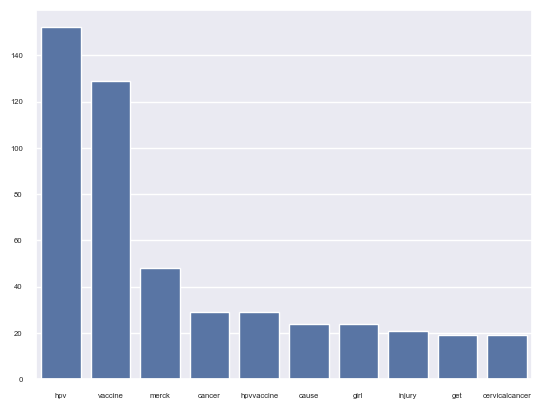

In [28]:
sns.barplot(x = words, y = numbers)
plt.savefig("topcommon_en_hpv.png", dpi=300)
plt.show()

In [29]:


# List of terms to filter
terms_to_filter = ["hpv", "vaccine", "hpvvaccine", "cervicalcancer", "cancer", "gardasil", "vaccination", "papillomavirus"]

# Filter the dictionary
id2word.filter_tokens(bad_ids = [id2word.token2id[word] for word in terms_to_filter if word in id2word.token2id])


corpus = [id2word.doc2bow(text) for text in corpus_model]

In [30]:
#Train computer and compute coherence
import gensim

In [31]:
#high accuracy
num_topics = 10
model = gensim.models.ldamulticore.LdaMulticore(corpus, 
                                                id2word=id2word, 
                                                num_topics=num_topics, 
                                                chunksize=2000, 
                                                iterations = 400, 
                                                passes = 20, 
                                                eval_every = None)

In [32]:
topic_print_model = model.print_topics(num_words=10)
df_topic_print_model = pd.DataFrame(topic_print_model, columns=['topic_id','words'])
df_topic_print_model

,topic_id,words
0,0,"0.083*""lawsuit"" + 0.061*""need"" + 0.055*""know"" ..."
1,1,"0.078*""trial"" + 0.065*""injure"" + 0.055*""read"" ..."
2,2,"0.082*""effect"" + 0.074*""side"" + 0.056*""vaccina..."
3,3,"0.176*""girl"" + 0.117*""get"" + 0.057*""vaccinesid..."
4,4,"0.098*""macron"" + 0.084*""jarnac"" + 0.081*""child..."
5,5,"0.084*""woman"" + 0.056*""merck"" + 0.050*""young"" ..."
6,6,"0.095*""fda"" + 0.054*""pharmaceutical"" + 0.051*""..."
7,7,"0.163*""merck"" + 0.090*""sue"" + 0.075*""science"" ..."
8,8,"0.083*""injury"" + 0.060*""baum"" + 0.051*""lawsuit..."
9,9,"0.095*""find"" + 0.087*""prevent"" + 0.074*""merck""..."


In [33]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=model, texts=data_english['doc_lemmatized'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.42154638364365515


In [34]:
df_topic_print_model.to_csv("topicmodelling_english_hpv.csv")

In [35]:
english_topics = pd.DataFrame({"id": data_english['X'], "text": data_english['full_text']})
def get_dominant_topic(lda_model, bow):
    topic_probs = lda_model.get_document_topics(bow, minimum_probability=0.0)
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]  # Topic with highest probability
    return dominant_topic

# Add the dominant topic to the dataset
english_topics["dominant_topic"] = [get_dominant_topic(model, doc) for doc in corpus]

print(english_topics)

      id                                               text  dominant_topic
0      3  Learn about Gardasil HPV Vaccine Multidistrict...               8
1      8  #HPV #AdverseEvents #vaccinations #Gardasil #M...               7
2     10  Where I live , gardasil is given to all childr...               2
3     16  #HPV #Gardasil #Merck #vaccini ""childrensheal...               7
4     17  Owens, now in her 30s, is a political commenta...               6
..   ...                                                ...             ...
233  820  #EnfantsEnDanger #Jarnac ""#boycott #macron #G...               4
234  823  ?? #macron #Gardasil #Jarnac ??""#EnfantsEnDan...               4
235  840  In 2014, 400 doctors had spoken out against th...               4
236  846  ?????Diane Harper mÈdecin spÈcialiste Vaccin, ...               0
237  872        #Merck #Gardasil #LÈvothyrox #Vioxx #Wargon               7

[238 rows x 3 columns]


Italian data

In [36]:
data_italian['char_count'] = data_italian['full_text'].apply(lambda x: len(x))
data_italian["word_count"] = data_italian['full_text'].apply(lambda x: len(x.split()))

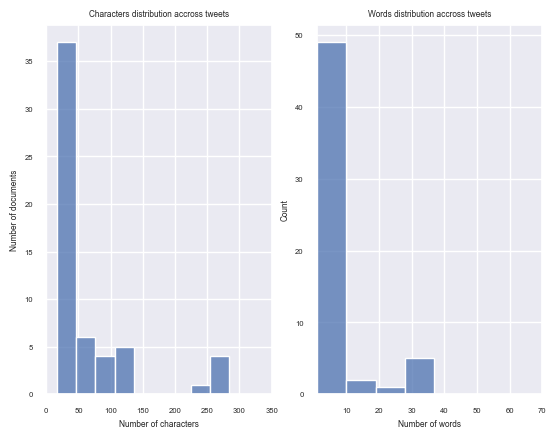

In [37]:
f, axes = plt.subplots(1, 2)

plot1 = sns.histplot(data_italian.char_count, binwidth = 30, ax=axes[0]).set(title='Characters distribution accross tweets', xlabel='Number of characters', ylabel='Number of documents')
plot2 = sns.histplot(data_italian.word_count, binwidth = 10, ax=axes[1]).set(title='Words distribution accross tweets', xlabel='Number of words')
axes[1].set_xlim(1,70)
axes[0].set_xlim(0,350)
plt.show()
f.savefig("word_char_it_hpv.png", dpi=300)


In [38]:
#tokenize
data_italian['tokens'] = data_italian['full_text'].apply(lambda x: nltk.word_tokenize(x))

In [39]:
data_italian['doc_prep'] = data_italian['tokens'].apply(lambda x: [w.lower() for w in x if w.isalpha() and len(w) > 2])

In [40]:
data_italian['doc_prep_nostop'] = data_italian['doc_prep'].apply(lambda x: [w for w in x if not w in it_stopwords])

In [41]:
it_nlp = spacy.load("it_core_news_sm", disable = ['parser','ner'])
def lemmatize(doc):
    lemmatized_doc = []
    for w in list(it_nlp.pipe(doc)):
        lemmatized_doc.append(" ".join(token.lemma_ for token in w))
    return lemmatized_doc
data_italian['lemmatize'] = data_italian['doc_prep_nostop'].apply(lambda x: lemmatize(x))

In [42]:
corpus_model = data_italian['lemmatize']
id2word = corpora.Dictionary(corpus_model)
id2word.filter_extremes(no_below = 1)
common = id2word.most_common(10)
common

[('associationpec', 10),
 ('vaccination', 9),
 ('vaccin', 8),
 ('poizon', 7),
 ('Hpv', 5),
 ('papillomavirus', 5),
 ('vaccare', 4),
 ('son', 4),
 ('merck', 4),
 ('via', 3)]

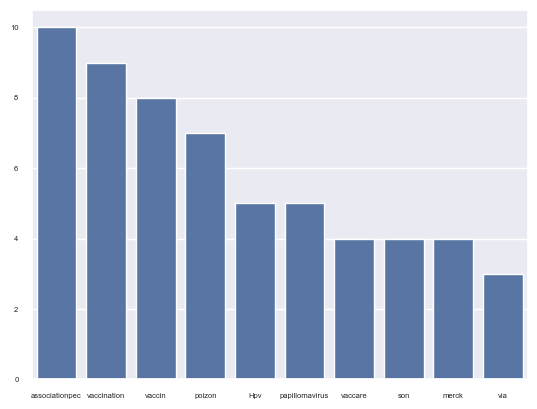

In [43]:
#plot
words = []
numbers = []
for c in common:
    w = c[0]
    words.append(w)
    
    n = c[1]
    numbers.append(n)
sns.barplot(x = words, y = numbers)
plt.savefig("topcommon_it.png", dpi=300)
plt.show()


In [44]:

# List of terms to filter
terms_to_filter = ["vaccination", "vaccin", "Hpv", "papillomavirus", "Hpvvaccine","vaccina", "gardasil", "hpv"]

# Filter the dictionary
id2word.filter_tokens(bad_ids = [id2word.token2id[word] for word in terms_to_filter if word in id2word.token2id])

corpus = [id2word.doc2bow(text) for text in corpus_model]
num_topics = 10
model = gensim.models.ldamulticore.LdaMulticore(corpus, 
                                                id2word=id2word, 
                                                num_topics=num_topics, 
                                                chunksize=2000, 
                                                iterations = 400, 
                                                passes = 20, 
                                                eval_every = None)
topic_print_model = model.print_topics(num_words=10)
df_topic_print_model = pd.DataFrame(topic_print_model, columns=['topic_id','words'])
df_topic_print_model

,topic_id,words
0,0,"0.035*""vaccare"" + 0.035*""danno"" + 0.018*""Roma""..."
1,1,"0.025*""volta"" + 0.025*""novax"" + 0.025*""spinta""..."
2,2,"0.257*""poizon"" + 0.076*""Effetssecondaires"" + 0..."
3,3,"0.117*""son"" + 0.079*""francia"" + 0.041*""vaccine..."
4,4,"0.069*""via"" + 0.036*""covidvaccina"" + 0.036*""va..."
5,5,"0.059*""merck"" + 0.059*""usare"" + 0.031*""vaccare..."
6,6,"0.051*""merck"" + 0.051*""poi"" + 0.051*""poiö"" + 0..."
7,7,"0.400*""associationpec"" + 0.004*""alnpvlre"" + 0...."
8,8,"0.187*""poiöson"" + 0.006*""poizon"" + 0.006*""asso..."
9,9,"0.049*""associationpec"" + 0.045*""nicoledelepino..."


In [45]:
coherence_model_lda = CoherenceModel(model=model, texts=data_italian['lemmatize'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.7208688657989677


In [46]:
df_topic_print_model.to_csv("topicmodelling_italian_hpv.csv")
italian_topics = pd.DataFrame({"id": data_italian['X'], "text": data_italian['full_text']})
def get_dominant_topic(lda_model, bow):
    topic_probs = lda_model.get_document_topics(bow, minimum_probability=0.0)
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]  # Topic with highest probability
    return dominant_topic

# Add the dominant topic to the dataset
italian_topics["dominant_topic"] = [get_dominant_topic(model, doc) for doc in corpus]

print(italian_topics)

      id                                               text  dominant_topic
0      2               #propagande!! #Vaccination #gardasil               3
1     11                           Done ?"#gardasil"#hpva??               4
2     20                         #Gardasil #GARDASIL poiZon               2
3     30                         #Gardasil #GARDASIL poiZon               2
4     44                   @AssociationPEC "#Gardasil "#HPV               7
5     58                        @AssociationPEC ""#Gardasil               7
6     65                         #Gardasil #GARDASIL poiZon               2
7     68  ??????? ?? ????? ??? ????? ?????? ??????  #Gar...               4
8     72                        @AssociationPEC ""#Gardasil               7
9    199            #Gardasil #GARDASIL poiÖ..poi Ö..sonson               6
10   201                        #HPV #Gardasil #vaccination               0
11   204                         #Gardasil #GARDASIL poiZon               2
12   211  Di

French dataset

In [47]:
data_french['char_count'] = data_french['full_text'].apply(lambda x: len(x))
data_french["word_count"] = data_french['full_text'].apply(lambda x: len(x.split()))

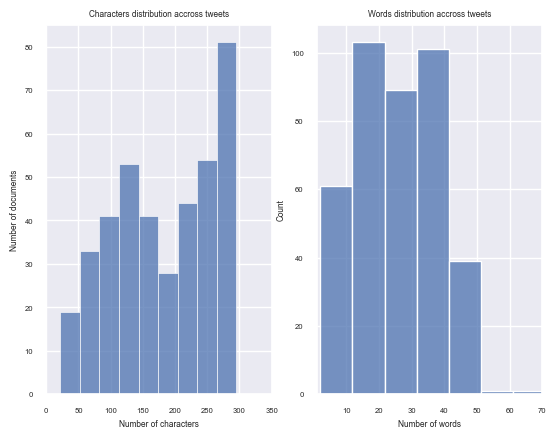

In [48]:
f, axes = plt.subplots(1, 2)

plot1 = sns.histplot(data_french.char_count, binwidth = 30, ax=axes[0]).set(title='Characters distribution accross tweets', xlabel='Number of characters', ylabel='Number of documents')
plot2 = sns.histplot(data_french.word_count, binwidth = 10, ax=axes[1]).set(title='Words distribution accross tweets', xlabel='Number of words')
axes[1].set_xlim(1,70)
axes[0].set_xlim(0,350)
plt.show()
f.savefig("word_char_fr_hpv.png", dpi=300)


In [49]:
data_french['tokens'] = data_french['full_text'].apply(lambda x: nltk.word_tokenize(x))
data_french['doc_prep'] = data_french['tokens'].apply(lambda x: [w.lower() for w in x if w.isalpha() and len(w) > 2])
data_french['doc_prep_nostop'] = data_french['doc_prep'].apply(lambda x: [w for w in x if not w in fr_stopwords])

In [50]:
fr_nlp = spacy.load("fr_core_news_sm", disable = ['parser','ner'])
def lemmatize(doc):
    lemmatized_doc = []
    for w in list(fr_nlp.pipe(doc)):
        lemmatized_doc.append(" ".join(token.lemma_ for token in w))
    return lemmatized_doc
data_french['lemmatize'] = data_french['doc_prep_nostop'].apply(lambda x: lemmatize(x))

In [51]:
corpus_model = data_french['lemmatize']
id2word = corpora.Dictionary(corpus_model)
id2word.filter_extremes(no_below = 5)
common = id2word.most_common(10)
common

[('vaccin', 156),
 ('papillomavirus', 103),
 ('contre', 83),
 ('vaccination', 70),
 ('effet', 70),
 ('secondaire', 67),
 ('enfant', 62),
 ('macron', 60),
 ('faire', 54),
 ('grave', 45)]

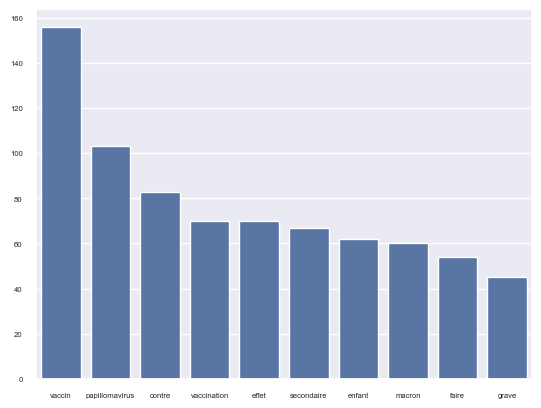

In [52]:
#plot
words = []
numbers = []
for c in common:
    w = c[0]
    words.append(w)
    
    n = c[1]
    numbers.append(n)
sns.barplot(x = words, y = numbers)
plt.savefig("topcommon_fr_hpv.png", dpi = 300)
plt.show()


In [53]:
# List of terms to filter
terms_to_filter = ["vaccin", "papillomavirus", "vaccination", "gardasil", "hpv"]

# Filter the dictionary
id2word.filter_tokens(bad_ids = [id2word.token2id[word] for word in terms_to_filter if word in id2word.token2id])


corpus = [id2word.doc2bow(text) for text in corpus_model]
corpus = [id2word.doc2bow(text) for text in corpus_model]
num_topics = 10
model = gensim.models.ldamulticore.LdaMulticore(corpus, 
                                                id2word=id2word, 
                                                num_topics=num_topics, 
                                                chunksize=2000, 
                                                iterations = 400, 
                                                passes = 20, 
                                                eval_every = None)
topic_print_model = model.print_topics(num_words=30)
df_topic_print_model = pd.DataFrame(topic_print_model, columns=['topic_id','words'])
df_topic_print_model

,topic_id,words
0,0,"0.097*""secondaire"" + 0.097*""effet"" + 0.074*""gr..."
1,1,"0.040*""contre"" + 0.038*""an"" + 0.037*""vacciner""..."
2,2,"0.047*""macron"" + 0.046*""risque"" + 0.042*""expli..."
3,3,"0.098*""enfant"" + 0.060*""macron"" + 0.044*""collë..."
4,4,"0.100*""contre"" + 0.067*""fille"" + 0.056*""cancer..."
5,5,"0.045*""avant"" + 0.040*""ce"" + 0.034*""faire"" + 0..."
6,6,"0.058*""merci"" + 0.057*""comme"" + 0.047*""fois"" +..."
7,7,"0.059*""faire"" + 0.045*""sans"" + 0.039*""pfizer"" ..."
8,8,"0.060*""vouloir"" + 0.057*""plus"" + 0.052*""tout"" ..."
9,9,"0.088*""cancer"" + 0.057*""bien"" + 0.044*""faire"" ..."


In [54]:
coherence_model_lda = CoherenceModel(model=model, texts=data_french['lemmatize'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.35209958821977194


In [55]:
df_topic_print_model.to_csv("topicmodelling_french_hpv.csv")
french_topics = pd.DataFrame({"id": data_french['X'], "text": data_french['full_text']})
def get_dominant_topic(lda_model, bow):
    topic_probs = lda_model.get_document_topics(bow, minimum_probability=0.0)
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]  # Topic with highest probability
    return dominant_topic

# Add the dominant topic to the dataset
french_topics["dominant_topic"] = [get_dominant_topic(model, doc) for doc in corpus]

print(french_topics)

       id                                               text  dominant_topic
0       1  Le dimanche c'est #D, comme #Destitution ???? ...               6
1       6  #Gardasil #HPV regardez les ÈlÈments du procËs...               1
2       7  Danger pour les ados ‡ la rentrÈe 2023! Le gou...               0
3       9  Papillomavirus : les mensonges de la propagand...               7
4      12  La prison ?""Non ! Pour eux ce sera camps de t...               6
..    ...                                                ...             ...
393  1688  #vaccin #gardasil contre le papillomavirus "#v...               3
394  2356  ?? ALERTE GENERALE ??" Il faut avertir les #an...               4
395  2374                   #Gardasil " "Business ou santÈ ?               9
396  2407  Petit dossier ?"medocean.re/actions/hpv-et-vÖ ...               2
397  2464  @olivierveran   AprËs 35000 personnes dÈcÈdÈes...               7

[398 rows x 3 columns]


In [56]:
data_english.to_csv("english_tm_hpv.csv")
data_italian.to_csv("italian_tm_hpv.csv")


In [57]:
data_french.to_csv("french_tm_hpv.csv")

In [58]:
!pip install wordcloud


In [59]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

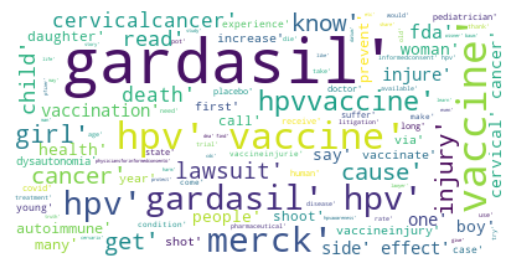

In [60]:
text = " ".join(data_english['doc_lemmatized'].astype(str))
wordcloud_en = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud_en, interpolation="bilinear")
plt.axis("off")
plt.savefig("englishwordcloud_hpv.png", dpi=300)
plt.show()

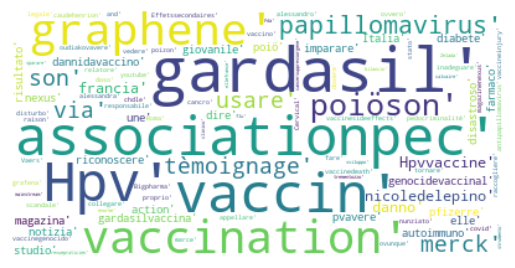

In [61]:
text1 = " ".join(data_italian['lemmatize'].astype(str))
unique_text = " ".join(set(text1.split()))
wordcloud_it = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(unique_text)
plt.figure()
plt.imshow(wordcloud_it, interpolation="bilinear")
plt.axis("off")
plt.savefig("italianwordcloud_hpv.png", dpi=300)
plt.show()

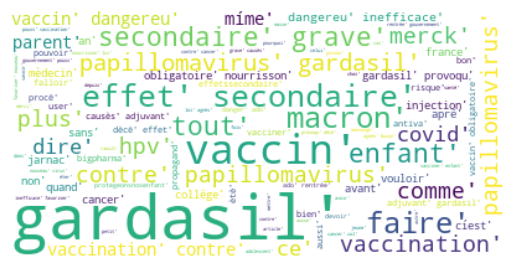

In [62]:
text2 = " ".join(data_french['lemmatize'].astype(str))
wordcloud_fr = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text2)
plt.figure()
plt.imshow(wordcloud_fr, interpolation="bilinear")
plt.axis("off")
plt.savefig("frenchwordcloud_hpv.png", dpi=300)
plt.show()

In [63]:
english_topics.to_csv("english_topics_hpv.csv")
italian_topics.to_csv("italian_topics_hpv.csv")
french_topics.to_csv("french_topics_hpv.csv")